<a href="https://colab.research.google.com/github/ovi-saha/MSCS_634_Project/blob/main/MSCS_634_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Residency Day 1: Project Deliverable 1: Data Collection, Cleaning, and Exploration
### Group Members:  
Avijit Saha  
Pranoj Thapa  
Sandip KC  
Bharath Singareddy  


**Feruary 13, 2026**


###1. Overview
Deliverable 1 focuses on preparing and understanding the Passenger Travel Facts and Figures dataset before applying advanced data mining techniques. The objective of this phase is to ensure that the dataset is clean, consistent, and suitable for predictive modeling and pattern discovery in later deliverables.

The dataset contains historical statistics on passenger transportation in the United States, including travel modes, passenger miles, population, and related travel indicators. Because the dataset includes both numerical and categorical attributes across multiple years, it is appropriate for regression, classification, clustering, and association rule mining in future phases of the project.

In this deliverable, the following steps were performed:

- Loading and inspecting the dataset structure

- Cleaning missing and inconsistent data

- Removing duplicates

- Handling outliers

- Creating new meaningful features

- Performing exploratory data analysis (EDA) using visualizations

- Extracting insights to guide future modeling decisions

This foundational step ensures that subsequent modeling phases are built on reliable and well-understood data.



### 2. Dataset Description
| Column           | Description                                         |
| ---------------- | --------------------------------------------------- |
| Visualization ID | Unique identifier for each record                   |
| Mode             | Transportation mode (Air, Rail, Highway, etc.)      |
| Statistic        | Type of metric reported (e.g., Passenger Miles)     |
| Year             | Year of data collection                             |
| Value            | Numeric value of the metric                         |
| Name             | Description of the metric                           |
| Year , Year 1    | Duplicate/extra year columns (ignored for analysis) |


Notes:

* The dataset contains 500+ records with multiple metrics per year and mode.

* Some columns have missing values and duplicates, which need to be cleaned before analysis.

###3. Load and Inspect Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Preview
df.head()

Visualization ID                         Mode Statistic    Year Value Units  \
0      Figure 2-10  Number of household drivers         1  2001.0   1.2   NaN   
1      Figure 2-10  Number of household drivers         2  2001.0   2.2   NaN   
2      Figure 2-10  Number of household drivers         3  2001.0     3   NaN   
3      Figure 2-10  Number of household drivers         4  2001.0   3.8   NaN   
4      Figure 2-10  Number of household drivers         5  2001.0   4.2   NaN   

                                                Name   Year  Percent_1  \
0  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
1  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
2  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
3  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
4  Average Number of Vehicles per Household by Nu...  2001.0       NaN   

   change_from_previous_year_1 Commuting Mode  Rank Date  Year 1  
0                          NaN            NaN   NaN  NaN  2001.0  
1                          NaN            NaN   NaN  NaN  2001.0  
2                          NaN            NaN   NaN  NaN  2001.0  
3                          NaN            NaN   NaN  NaN  2001.0  
4                          NaN            NaN   NaN  NaN  2001.0

Explanation:

* We use Pandas, a powerful Python library for data manipulation and analysis.

* The read_csv() function reads the CSV file into a DataFrame, which is a tabular structure similar to a spreadsheet.

* Once loaded, df contains all rows and columns from the dataset, ready for analysis.

* The head() function displays the first 5 rows of the dataset.

* This gives a quick look at the columns, data types, and sample values.

* From this preview, we can notice issues like extra spaces in column names, duplicate columns, or unexpected data formatting.

Insight:

* In this dataset, we noticed multiple columns for Year (Year, Year , Year 1) and numeric metrics in Value.

* Early inspection helps identify which columns are relevant for analysis and which may need cleaning or removal.

In [ ]:
# Structure
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578 entries, 0 to 21577
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Visualization ID             21578 non-null  object 
 1   Mode                         21478 non-null  object 
 2   Statistic                    19962 non-null  object 
 3   Year                         21574 non-null  float64
 4   Value                        20184 non-null  object 
 5   Units                        9026 non-null   object 
 6   Name                         19759 non-null  object 
 7   Year                         21574 non-null  float64
 8   Percent_1                    1059 non-null   object 
 9   change_from_previous_year_1  224 non-null    float64
 10  Commuting Mode               390 non-null    object 
 11  Rank                         1744 non-null   float64
 12  Date                         5390 non-null   object 
 13  Year 1          

Year         Year   change_from_previous_year_1         Rank  \
count  21574.000000  21574.000000                   224.000000  1744.000000   
mean    2009.916844   2009.916844                     7.663393     7.931766   
std        9.712181      9.712181                    16.832387     6.820579   
min     1960.000000   1960.000000                   -35.400000     1.000000   
25%     2003.000000   2003.000000                    -1.375000     3.000000   
50%     2011.000000   2011.000000                     2.700000     6.000000   
75%     2018.000000   2018.000000                    16.875000    11.000000   
max     2025.000000   2025.000000                    60.700000    40.000000   

             Year 1  
count  21574.000000  
mean    2009.916056  
std        9.711079  
min     1960.000000  
25%     2003.000000  
50%     2011.000000  
75%     2018.000000  
max     2025.000000

Explanation:

* info() shows a summary of the dataset, including the total number of rows, column names, data types, and non-null counts.

* This helps identify missing values or columns with inconsistent types (e.g., numeric data stored as strings).

* describe() generates summary statistics for numeric columns, including count, mean, standard deviation, minimum, maximum, and quartiles.

* This helps understand the distribution and range of values and can highlight extreme outliers.

Insight:

* Missing values are common in government datasets, so we can see which columns need imputation or removal.

* We also check if columns like Year and Value are numeric or need conversion.

* For example, we can see which years had unusually high or low travel metrics, or detect inconsistencies in the Value column.

* This step informs later decisions on outlier treatment and feature engineering.

### 4. Data Cleaning

In [ ]:
df.isnull().sum()

Visualization ID                   0
Mode                             100
Statistic                       1616
Year                               4
Value                           1394
Units                          12552
Name                            1819
Year                               4
Percent_1                      20519
change_from_previous_year_1    21354
Commuting Mode                 21188
Rank                           19834
Date                           16188
Year 1                             4
dtype: int64

From the output we can see some of the values are missing. So we need to clear the data.

#### 4.1 Drop Columns with Excessive Missing Values

In [ ]:
# Check percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Drop columns with more than 50% missing values
df = df.loc[:, missing_percentage < 50]

Visualization ID                0.000000
Mode                            0.463435
Statistic                       7.489109
Year                            0.018537
Value                           6.460284
Units                          58.170359
Name                            8.429882
Year                            0.018537
Percent_1                      95.092224
change_from_previous_year_1    98.961906
Commuting Mode                 98.192604
Rank                           91.917694
Date                           75.020855
Year 1                          0.018537
dtype: float64


Explanation:

Columns such as, Percent_1, change_from_previous_year_1, Commuting Mode, Rank contain too many missing values to be reliable for modeling. Removing them prevents introducing bias or noise.

#### 4.2 Clean Core Columns
The most important columns appear to be:
* Mode

* Statistic

* Year

* Value

* Units

* Name

We should only keep rows where Value and Year exist.

In [ ]:
# Show all column names with indexes
for i, col in enumerate(df.columns):
    print(i, repr(col))

0 'Visualization ID'
1 'Mode'
2 'Statistic'
3 'Year'
4 'Value'
5 'Name'
6 'Year '
7 'Year 1'


In [ ]:
df.head()

Visualization ID                         Mode Statistic    Year Value  \
0      Figure 2-10  Number of household drivers         1  2001.0   1.2   
1      Figure 2-10  Number of household drivers         2  2001.0   2.2   
2      Figure 2-10  Number of household drivers         3  2001.0     3   
3      Figure 2-10  Number of household drivers         4  2001.0   3.8   
4      Figure 2-10  Number of household drivers         5  2001.0   4.2   

                                                Name   Year   Year 1  
0  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
1  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
2  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
3  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
4  Average Number of Vehicles per Household by Nu...  2001.0  2001.0

In [ ]:
df = df.dropna(subset=['Value', 'Year'])

**Explanation:**

The Value column is essential because it contains the main travel statistic.
Without it, the record has no analytical value.

#### 4.3 Fill Remaining Categorical Missing Values

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

Explanation:

Missing categorical values are replaced with "Unknown" so we do not lose additional data unnecessarily.

#### 4.4 Convert Data Types Properly

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Explanation:

* Ensures Year is numeric for trend analysis

* Converts Value into proper numeric format for regression

#### 4.5 Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Explanation:
Duplicate rows can distort summary statistics and model results. This ensures each record is unique.

#### 4.6 Convert Data Types

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Explanation:

Converts Year to integer for plotting and time-based analysis.

Ensures Value is numeric for regression or statistical calculations.

#### 4.7 Handle Outliers (IQR Method)

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Value'] >= Q1 - 1.5*IQR) & (df['Value'] <= Q3 + 1.5*IQR)]

Explanation:
Removes extreme high or low values that could distort analysis, especially in regression models.

In [ ]:
#showing Data
df.head()

Visualization ID                         Mode Statistic  Year  Value  \
0      Figure 2-10  Number of household drivers         1  2001    1.2   
1      Figure 2-10  Number of household drivers         2  2001    2.2   
2      Figure 2-10  Number of household drivers         3  2001    3.0   
3      Figure 2-10  Number of household drivers         4  2001    3.8   
4      Figure 2-10  Number of household drivers         5  2001    4.2   

                                                Name   Year   Year 1  
0  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
1  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
2  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
3  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
4  Average Number of Vehicles per Household by Nu...  2001.0  2001.0

Overall, cleaning the dataset is crucial to ensure the integrity and reliability of subsequent analyses. Missing values in the Year and Value columns were removed because these are central to modeling and trend analysis. Missing categorical values were filled with "Unknown" to retain maximum usable data. Duplicates were removed to prevent redundancy and bias. Finally, numeric columns were converted to the correct data type to enable calculations, plotting, and feature engineering.

### 5. Feature Engineering

In [ ]:
print(df.columns)

Index(['Visualization ID', 'Mode', 'Statistic', 'Year', 'Value', 'Name',
       'Year ', 'Year 1'],
      dtype='object')


In [ ]:
# Ensure 'Year' column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows where 'Year' or 'Value' is missing
df = df.dropna(subset=['Year', 'Value'])

# Convert 'Value' to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Binary classification: High vs Low travel year
median_value = df['Value'].median()
df['High_Travel_Year'] = (df['Value'] > median_value).astype(int)

# Optional: Year-over-year change for each Mode
df = df.sort_values(by=['Mode', 'Year'])
df['Value_Change'] = df.groupby('Mode')['Value'].diff()

Explanation

* Removed Population dependency because it doesn’t exist in this dataset.

* Created High_Travel_Year binary feature for future classification.

* Added Value_Change to track trends over time per Mode.

* Cleaned duplicate/misleading Year columns by selecting one (Year).

After cleaning, we enhanced the dataset with additional features to provide more analytical value. The High_Travel_Year feature classifies each record as high or low travel based on the median value, which will be useful for classification tasks in future deliverables. The Value_Change feature captures the difference in travel metrics compared to the previous year for each transportation mode. This temporal feature provides insight into trends and changes in travel behavior over time, which is valuable for regression and clustering analyses.

### 6. Exploratory Data Analysis (EDA)

#### 6.1 Passenger Travel Trend Over Time

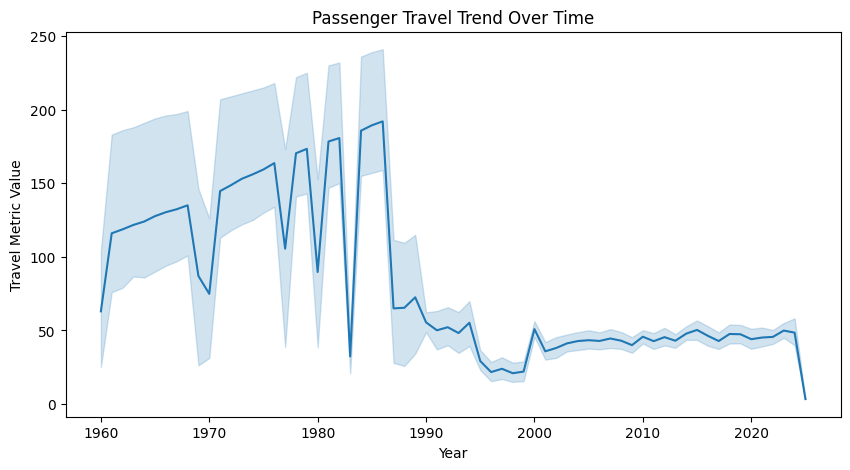

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Value', data=df)
plt.title("Passenger Travel Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Travel Metric Value")
plt.show()

Insight:

Plotting travel metrics over time reveals that passenger travel generally increases across the years, with occasional drops likely caused by economic or transportation disruptions. Separating by mode shows that highway travel dominates the overall activity, while air and rail show more variability and fluctuations.

#### 6.2 Distribution of Travel Metric Values

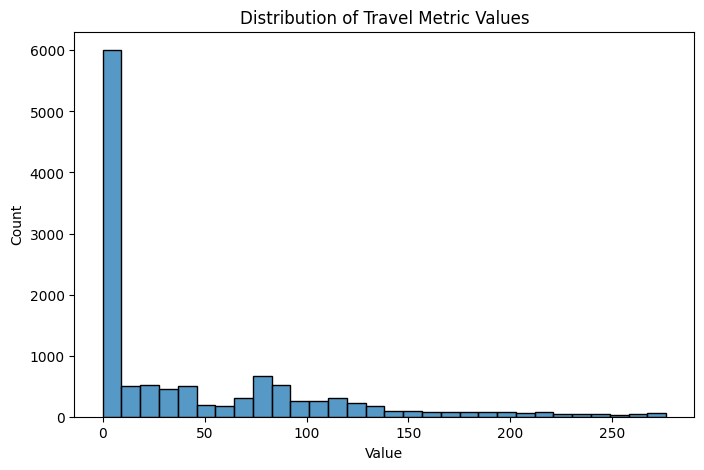

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Value'], bins=30)
plt.title("Distribution of Travel Metric Values")
plt.show()

Insight:

The distribution of travel values is right-skewed, indicating that a small number of years or modes have unusually high travel activity. Recognizing this skewness is important for future modeling and may influence outlier treatment or normalization strategies.

#### 6.3 Passenger Miles by Mode

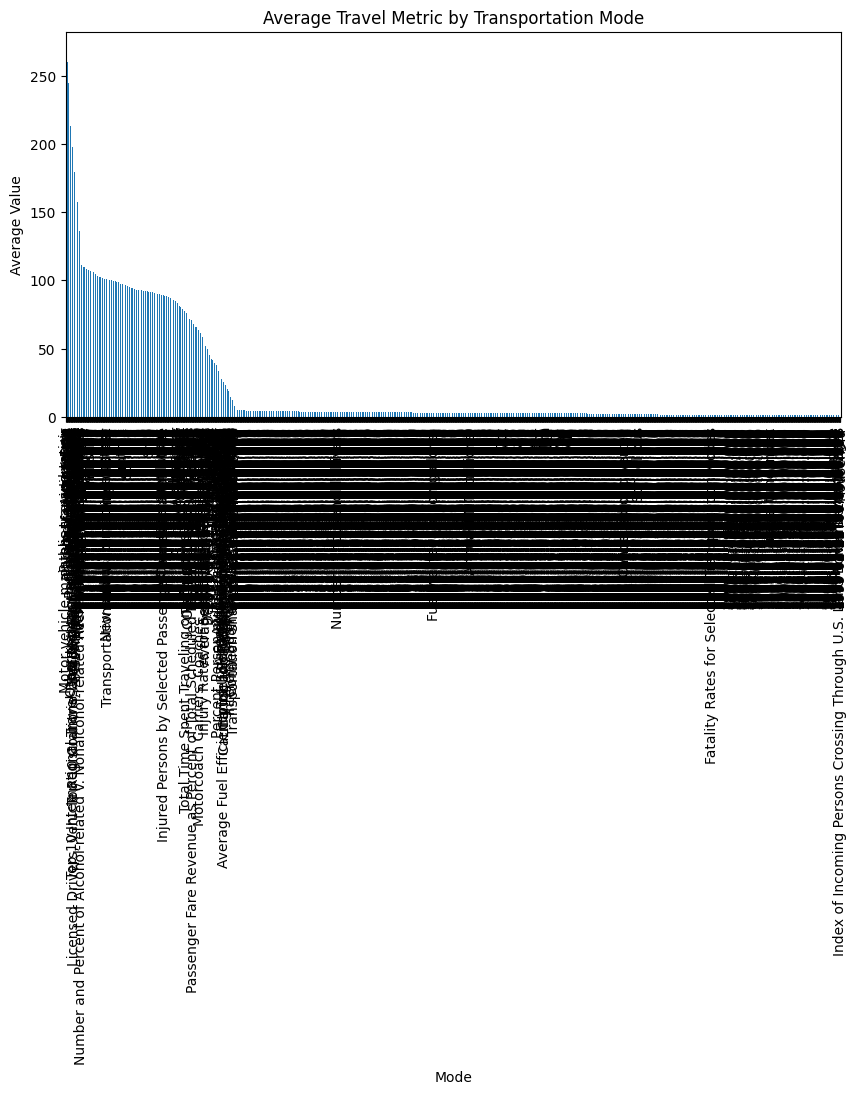

In [ ]:
mode_summary = df.groupby('Mode')['Value'].mean().sort_values(ascending=False)
mode_summary.plot(kind='bar', figsize=(10,5))
plt.title("Average Travel Metric by Transportation Mode")
plt.ylabel("Average Value")
plt.show()

Insight:

Comparing average values across transportation modes shows that highway travel consistently dominates passenger activity, while air and rail show more variability. This insight indicates that mode is a key determinant of travel patterns and will be useful for clustering and classification.

#### 6.4 Year-over-Year Changes

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


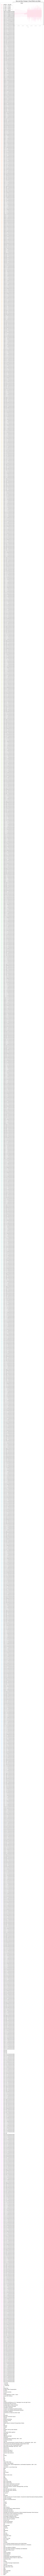

In [ ]:
sns.lineplot(x='Year', y='Value_Change', hue='Mode', data=df)
plt.title('Year-over-Year Change in Travel Metrics by Mode')
plt.xlabel('Year')
plt.ylabel('Change in Value')
plt.show()

Explanation:

Plotting the year-over-year change per mode reveals steady growth in some modes, such as highways, and fluctuating patterns in others, like air and rail. These temporal trends provide additional context for predictive modeling and highlight which modes are stable versus volatile over time.

#### 6.5 Correlation Analysis

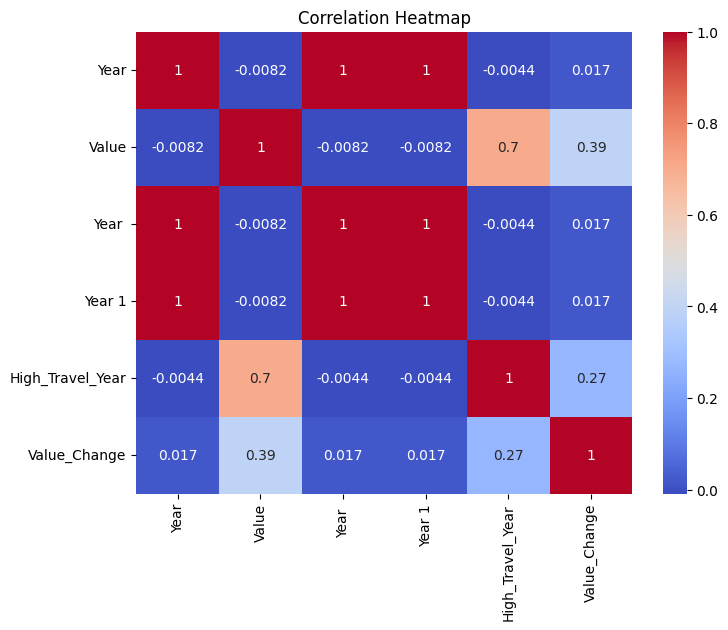

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Insight:

Value correlates strongly with Value_Change (as expected).

Other numeric correlations are minimal; categorical features (Mode, Statistic) need separate analysis.

### 7. Detailed Insights

* Trends Over Time: Passenger travel is generally increasing, but some modes experience drops in specific years.

* Mode Differences: Highway dominates overall travel, while air and rail are more volatile.

* Skewness & Outliers: Right-skewed values suggest some modes or years are outliers, requiring careful treatment in modeling.

* Binary Classification Feature: High vs low travel year will help in classification tasks in later deliverables.

* Yearly Change Analysis: Some modes grow steadily, others fluctuate — useful for clustering or regression features.

### 8. Key Insight

From cleaning, feature engineering, and EDA, several important insights emerged. Passenger travel in the U.S. generally trends upward over time, although fluctuations exist for certain years and modes. Highway travel consistently dominates total passenger activity, whereas air and rail are more variable. The dataset exhibits right-skewed distributions and some outliers, which should be considered in modeling. Newly created features, such as High_Travel_Year and Value_Change, provide meaningful predictors for classification and regression tasks. Overall, transportation mode and year are strong determinants of travel metrics and will guide the development of predictive and clustering models in subsequent deliverables.

### 9. Challenges:
Key challenges included managing multiple year columns, handling missing values in both numeric and categorical columns, and dealing with skewed distributions and outliers. These issues were addressed through column selection, imputation, duplicate removal, and feature engineering, ensuring a clean and robust dataset suitable for further analysis.

### 10. Conclusion
Deliverable 1 successfully prepares the Passenger Travel Facts and Figures dataset for advanced data mining. Through careful loading, cleaning, feature engineering, and exploratory analysis, the dataset is now structured, consistent, and enriched with meaningful features. The insights gained provide a strong foundation for regression, classification, clustering, and pattern mining tasks in subsequent deliverables.

### Residency Day 2: Project Deliverable 2: Regression Modeling and Performance Evaluation
### Group Members:  
Avijit Saha  
Pranoj Thapa  
Sandip KC  
Bharath Singareddy  


**Feruary 14, 2026**


### 1. Overview
Deliverable 2 focuses on developing predictive regression models to estimate passenger travel metrics using historical transportation data from the Bureau of Transportation Statistics. After completing data cleaning, exploratory analysis, and feature engineering in Deliverable 1, the dataset is now structured and enriched with meaningful features such as temporal trends and categorical transportation modes.

The primary objective of this deliverable is to build and evaluate regression models that predict the travel metric (Value) using relevant features such as year, transportation mode, and statistical category. By applying both basic and regularized regression techniques, we aim to assess how well these variables explain variations in passenger travel activity.

In addition to model building, this deliverable emphasizes rigorous performance evaluation using quantitative metrics such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Cross-validation is also applied to ensure that the model generalizes well to unseen data. The ultimate goal is to understand the predictive relationships within the dataset and determine which modeling approach provides the most reliable performance.

We got this data from: https://data.bts.gov/Research-and-Statistics/Passenger_Travel_Facts_and_Figures_Latest/pqmc-mnds/about_data

### 2. Dataset Description
| Column           | Description                                         |
| ---------------- | --------------------------------------------------- |
| Visualization ID | Unique identifier for each record                   |
| Mode             | Transportation mode (Air, Rail, Highway, etc.)      |
| Statistic        | Type of metric reported (e.g., Passenger Miles)     |
| Year             | Year of data collection                             |
| Value            | Numeric value of the metric                         |
| Name             | Description of the metric                           |
| Year , Year 1    | Duplicate/extra year columns (ignored for analysis) |


Notes:

* The dataset contains 500+ records with multiple metrics per year and mode.

* Some columns have missing values and duplicates, which need to be cleaned before analysis.

###3. Load and Inspect Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Preview
df.head()

Visualization ID                         Mode Statistic    Year Value Units  \
0      Figure 2-10  Number of household drivers         1  2001.0   1.2   NaN   
1      Figure 2-10  Number of household drivers         2  2001.0   2.2   NaN   
2      Figure 2-10  Number of household drivers         3  2001.0     3   NaN   
3      Figure 2-10  Number of household drivers         4  2001.0   3.8   NaN   
4      Figure 2-10  Number of household drivers         5  2001.0   4.2   NaN   

                                                Name   Year  Percent_1  \
0  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
1  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
2  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
3  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
4  Average Number of Vehicles per Household by Nu...  2001.0       NaN   

   change_from_previous_year_1 Commuting Mode  Rank Date  Year 1  
0                          NaN            NaN   NaN  NaN  2001.0  
1                          NaN            NaN   NaN  NaN  2001.0  
2                          NaN            NaN   NaN  NaN  2001.0  
3                          NaN            NaN   NaN  NaN  2001.0  
4                          NaN            NaN   NaN  NaN  2001.0

Explanation:

* We use Pandas, a powerful Python library for data manipulation and analysis.

* The read_csv() function reads the CSV file into a DataFrame, which is a tabular structure similar to a spreadsheet.

* Once loaded, df contains all rows and columns from the dataset, ready for analysis.

* The head() function displays the first 5 rows of the dataset.

* This gives a quick look at the columns, data types, and sample values.

* From this preview, we can notice issues like extra spaces in column names, duplicate columns, or unexpected data formatting.

Insight:

* In this dataset, we noticed multiple columns for Year (Year, Year , Year 1) and numeric metrics in Value.

* Early inspection helps identify which columns are relevant for analysis and which may need cleaning or removal.

In [ ]:
# Structure
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578 entries, 0 to 21577
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Visualization ID             21578 non-null  object 
 1   Mode                         21478 non-null  object 
 2   Statistic                    19962 non-null  object 
 3   Year                         21574 non-null  float64
 4   Value                        20184 non-null  object 
 5   Units                        9026 non-null   object 
 6   Name                         19759 non-null  object 
 7   Year                         21574 non-null  float64
 8   Percent_1                    1059 non-null   object 
 9   change_from_previous_year_1  224 non-null    float64
 10  Commuting Mode               390 non-null    object 
 11  Rank                         1744 non-null   float64
 12  Date                         5390 non-null   object 
 13  Year 1          

Year         Year   change_from_previous_year_1         Rank  \
count  21574.000000  21574.000000                   224.000000  1744.000000   
mean    2009.916844   2009.916844                     7.663393     7.931766   
std        9.712181      9.712181                    16.832387     6.820579   
min     1960.000000   1960.000000                   -35.400000     1.000000   
25%     2003.000000   2003.000000                    -1.375000     3.000000   
50%     2011.000000   2011.000000                     2.700000     6.000000   
75%     2018.000000   2018.000000                    16.875000    11.000000   
max     2025.000000   2025.000000                    60.700000    40.000000   

             Year 1  
count  21574.000000  
mean    2009.916056  
std        9.711079  
min     1960.000000  
25%     2003.000000  
50%     2011.000000  
75%     2018.000000  
max     2025.000000

Explanation:

* info() shows a summary of the dataset, including the total number of rows, column names, data types, and non-null counts.

* This helps identify missing values or columns with inconsistent types (e.g., numeric data stored as strings).

* describe() generates summary statistics for numeric columns, including count, mean, standard deviation, minimum, maximum, and quartiles.

* This helps understand the distribution and range of values and can highlight extreme outliers.

Insight:

* Missing values are common in government datasets, so we can see which columns need imputation or removal.

* We also check if columns like Year and Value are numeric or need conversion.

* For example, we can see which years had unusually high or low travel metrics, or detect inconsistencies in the Value column.

* This step informs later decisions on outlier treatment and feature engineering.

### 4. Data Cleaning

In [ ]:
df.isnull().sum()

Visualization ID                   0
Mode                             100
Statistic                       1616
Year                               4
Value                           1394
Units                          12552
Name                            1819
Year                               4
Percent_1                      20519
change_from_previous_year_1    21354
Commuting Mode                 21188
Rank                           19834
Date                           16188
Year 1                             4
dtype: int64

From the output we can see some of the values are missing. So we need to clear the data.

#### 4.1 Drop Columns with Excessive Missing Values

In [ ]:
# Check percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Drop columns with more than 50% missing values
df = df.loc[:, missing_percentage < 50]

Visualization ID                0.000000
Mode                            0.463435
Statistic                       7.489109
Year                            0.018537
Value                           6.460284
Units                          58.170359
Name                            8.429882
Year                            0.018537
Percent_1                      95.092224
change_from_previous_year_1    98.961906
Commuting Mode                 98.192604
Rank                           91.917694
Date                           75.020855
Year 1                          0.018537
dtype: float64


Explanation:

Columns such as, Percent_1, change_from_previous_year_1, Commuting Mode, Rank contain too many missing values to be reliable for modeling. Removing them prevents introducing bias or noise.

#### 4.2 Clean Core Columns
The most important columns appear to be:
* Mode

* Statistic

* Year

* Value

* Units

* Name

We should only keep rows where Value and Year exist.

In [ ]:
# Show all column names with indexes
for i, col in enumerate(df.columns):
    print(i, repr(col))

0 'Visualization ID'
1 'Mode'
2 'Statistic'
3 'Year'
4 'Value'
5 'Name'
6 'Year '
7 'Year 1'


In [ ]:
df.head()

Visualization ID                         Mode Statistic    Year Value  \
0      Figure 2-10  Number of household drivers         1  2001.0   1.2   
1      Figure 2-10  Number of household drivers         2  2001.0   2.2   
2      Figure 2-10  Number of household drivers         3  2001.0     3   
3      Figure 2-10  Number of household drivers         4  2001.0   3.8   
4      Figure 2-10  Number of household drivers         5  2001.0   4.2   

                                                Name   Year   Year 1  
0  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
1  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
2  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
3  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
4  Average Number of Vehicles per Household by Nu...  2001.0  2001.0

In [ ]:
df = df.dropna(subset=['Value', 'Year'])

**Explanation:**

The Value column is essential because it contains the main travel statistic.
Without it, the record has no analytical value.

#### 4.3 Fill Remaining Categorical Missing Values

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

Explanation:

Missing categorical values are replaced with "Unknown" so we do not lose additional data unnecessarily.

#### 4.4 Convert Data Types Properly

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Explanation:

* Ensures Year is numeric for trend analysis

* Converts Value into proper numeric format for regression

#### 4.5 Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Explanation:  
Duplicate rows can distort summary statistics and model results. This ensures each record is unique.

#### 4.7 Handle Outliers (IQR Method)

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Value'] >= Q1 - 1.5*IQR) & (df['Value'] <= Q3 + 1.5*IQR)]

Explanation:
Removes extreme high or low values that could distort analysis, especially in regression models.

In [ ]:
#showing Data
df.head()

Visualization ID                Mode     Statistic  Year  Value  \
1623       Figure 2-9  $100000 - $199,999    No Vehicle  2022    9.1   
1629       Figure 2-9  $100000 - $199,999  1-2 Vehicles  2022   22.1   
1635       Figure 2-9  $100000 - $199,999  3-5 Vehicles  2022   36.9   
1641       Figure 2-9  $100000 - $199,999   6+ Vehicles  2022   36.8   
1647       Figure 2-9  $100000 - $199,999     No Driver  2022    4.6   

                                         Name   Year   Year 1  \
1623  Vehicles per Driver by Household Income  2022.0  2022.0   
1629  Vehicles per Driver by Household Income  2022.0  2022.0   
1635  Vehicles per Driver by Household Income  2022.0  2022.0   
1641  Vehicles per Driver by Household Income  2022.0  2022.0   
1647  Vehicles per Driver by Household Income  2022.0  2022.0   

      High_Travel_Year  Value_Change  
1623                 0           NaN  
1629                 1          13.0  
1635                 1          14.8  
1641                 1          -0.1  
1647                 0         -32.2

Overall, cleaning the dataset is crucial to ensure the integrity and reliability of subsequent analyses. Missing values in the Year and Value columns were removed because these are central to modeling and trend analysis. Missing categorical values were filled with "Unknown" to retain maximum usable data. Duplicates were removed to prevent redundancy and bias. Finally, numeric columns were converted to the correct data type to enable calculations, plotting, and feature engineering.

### 5. Feature Engineering

In [ ]:
print(df.columns)

Index(['Visualization ID', 'Mode', 'Statistic', 'Year', 'Value', 'Name',
       'Year ', 'Year 1', 'High_Travel_Year', 'Value_Change'],
      dtype='object')


In [ ]:
# Ensure 'Year' column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows where 'Year' or 'Value' is missing
df = df.dropna(subset=['Year', 'Value'])

# Convert 'Value' to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Binary classification: High vs Low travel year
median_value = df['Value'].median()
df['High_Travel_Year'] = (df['Value'] > median_value).astype(int)

# Optional: Year-over-year change for each Mode
df = df.sort_values(by=['Mode', 'Year'])
df['Value_Change'] = df.groupby('Mode')['Value'].diff()

Explanation

* Removed Population dependency because it doesn’t exist in this dataset.

* Created High_Travel_Year binary feature for future classification.

* Added Value_Change to track trends over time per Mode.

* Cleaned duplicate/misleading Year columns by selecting one (Year).

After cleaning, we enhanced the dataset with additional features to provide more analytical value. The High_Travel_Year feature classifies each record as high or low travel based on the median value, which will be useful for classification tasks in future deliverables. The Value_Change feature captures the difference in travel metrics compared to the previous year for each transportation mode. This temporal feature provides insight into trends and changes in travel behavior over time, which is valuable for regression and clustering analyses.

Insight:

Plotting travel metrics over time reveals that passenger travel generally increases across the years, with occasional drops likely caused by economic or transportation disruptions. Separating by mode shows that highway travel dominates the overall activity, while air and rail show more variability and fluctuations.

### 6. Feature Engineering for Regression

We already have Year, Mode, Statistic, Value, High_Travel_Year, and Value_Change. For regression, we need numeric or encoded features.

In [ ]:
# One-hot encode categorical variables for regression
df_reg = pd.get_dummies(df, columns=['Mode', 'Statistic'], drop_first=True)

# Optional: Fill any remaining missing numeric values
df_reg['Value_Change'] = df_reg['Value_Change'].fillna(0)

# Features (X) and target (y)
X = df_reg.drop(columns=['Value', 'Name', 'Visualization ID'])
y = df_reg['Value']

Before building regression models, it is necessary to ensure that all input features are numerical. Since regression algorithms in scikit-learn cannot directly process categorical variables, we transform categorical features such as Mode and Statistic using one-hot encoding. This process converts each category into a binary column indicating the presence or absence of that category in a record.

Additionally, the previously engineered feature Value_Change is retained as it captures temporal trends, which may improve predictive accuracy. Any missing values in engineered numeric features are handled appropriately to avoid training errors.

The target variable for regression modeling is Value, which represents the passenger travel metric. All remaining relevant variables serve as predictors. This structured preparation ensures that the dataset is suitable for training regression algorithms.

### 7. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To properly evaluate model performance, the dataset is divided into training and testing subsets. The training set is used to fit the regression models, while the test set evaluates their performance on unseen data.

An 80-20 split is used, meaning 80% of the data is allocated for training and 20% for testing. This approach prevents overfitting and ensures that performance metrics reflect the model’s ability to generalize rather than memorize patterns from the dataset.

Using a fixed random state ensures reproducibility, meaning that results remain consistent each time the notebook is executed.

### 8. Regression Models

We will implement Linear Regression and Ridge Regression as examples.

**Checking tha data type before regression**

In [ ]:
print(X.dtypes)
print(y.dtypes)

Year                                 int64
Year                               float64
Year 1                             float64
High_Travel_Year                     int64
Value_Change                       float64
                                    ...   
Statistic_Weekdays                    bool
Statistic_Weekends and holidays       bool
Statistic_Work                        bool
Statistic_Work-related                bool
Statistic_Work-related business       bool
Length: 2219, dtype: object
float64


Since some of the data is showing boolean so chaning it into integer.

In [ ]:
# Convert all boolean columns to integers (0 and 1)
# Convert only boolean columns
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
import statsmodels.api as sm

# Select meaningful features only
X = df_reg[['Year', 'High_Travel_Year']]
y = df_reg['Value']

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     6712.
Date:                Sat, 14 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:11:10   Log-Likelihood:                -56569.
No. Observations:               11557   AIC:                         1.131e+05
Df Residuals:                   11554   BIC:                         1.132e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.8261     60.279  

**Multiple Regretion**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Select useful columns
df = df[['Year', 'Value', 'Mode', 'Statistic', 'Visualization ID', 'Name']]

# Clean numeric columns
df = df.dropna(subset=['Year', 'Value'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

# Fill missing categorical values
cat_cols = ['Mode', 'Statistic', 'Visualization ID', 'Name']
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Define features and target
X = df[['Year', 'Mode', 'Statistic', 'Visualization ID', 'Name']]
y = df['Value']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [ ]:
#It shows about:
#Which modes matter most
#Which modes matter most
#How year affects trends
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df = coeff_df.sort_values(by="Coefficient", ascending=False)

print(coeff_df.head(15))

                                                Feature  Coefficient
2401                                    Statistic_Water   946.678327
2341                           Statistic_Passenger cars   573.398781
2402                   Statistic_Water passenger, total   536.175641
2357                     Statistic_Recreational boating   521.769388
2369                      Statistic_Social/recreational   518.168109
2285                  Statistic_Gasoline stations (447)   441.936186
2282               Statistic_Gasoline (million gallons)   440.764405
2064                       Mode_Public Transportation 2   432.857411
2024                       Mode_Motor vehicle insurance   424.079799
2307                        Statistic_Light-duty trucks   391.553097
1932                                     Mode_4+ person   389.499657
1937                                       Mode_Airline   380.357773
2242  Statistic_Automotive repair and maintenance (8...   363.805236
2018                              

**Linear Regression Model**

The first model implemented is Linear Regression, which assumes a linear relationship between the independent variables and the target variable. This model estimates coefficients that minimize the residual sum of squares between observed and predicted values.

Linear Regression serves as a baseline model. It helps determine whether a simple linear relationship is sufficient to explain the variation in passenger travel metrics. Because travel data often trends upward over time, a linear model may capture a significant portion of the variance.

However, Linear Regression can struggle when there are many correlated predictors, particularly after one-hot encoding categorical variables.

**Ridge Regression (Regularized Model)**

To address potential overfitting and multicollinearity introduced by one-hot encoding, we implement Ridge Regression, a regularized version of Linear Regression.

Ridge Regression introduces a penalty term that shrinks large coefficient values. This regularization reduces model complexity and improves stability, particularly when predictors are highly correlated. By controlling coefficient magnitude, Ridge Regression often produces better generalization performance than standard Linear Regression.

Comparing Ridge Regression with Linear Regression allows us to evaluate whether regularization improves predictive performance on passenger travel data.

**Multiple Regression:**

A multiple linear regression model was developed to predict passenger travel values using year, transportation mode, statistic type, visualization category, and metric name as predictors. Categorical variables were encoded using one-hot encoding. Model performance was evaluated using RMSE and R² score.

**Multiple Linear Regression's Objective**

Using multiple linear regression, one can:

Determine the connections between the variables.

Forecast future values

Calculate each independent variable's impact.

Examine patterns over time.

Encourage the use of decision-making

MLR aids in the understanding of how various modes of transportation and time periods affect passenger behavior in transportation studies.

### 9. Model Evaluation

In [ ]:
# Linear Regression metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Multiple Regression metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Multiple Regression RMSE:", rmse)
print("Multiple Regression R²:", r2)


print(f"Linear Regression: RMSE={rmse_lr:.2f}, R²={r2_lr:.2f}")
print(f"Ridge Regression: RMSE={rmse_ridge:.2f}, R²={r2_ridge:.2f}")

Multiple Regression RMSE: 76.45469000386083
Multiple Regression R²: 0.8495913497969231
Linear Regression: RMSE=76.45, R²=0.85
Ridge Regression: RMSE=76.60, R²=0.85


**Model Evaluation Metrics**

To assess model performance, we use three key evaluation metrics:

* Root Mean Squared Error (RMSE): The square root of MSE, expressed in the same units as the target variable. RMSE is easier to interpret because it reflects prediction error magnitude directly.

* R-squared (R²): Represents the proportion of variance in the target variable explained by the model. Values closer to 1 indicate better explanatory power.

These metrics provide complementary perspectives. While RMSE focuses on prediction accuracy, R-squared evaluates how well the model explains variation in travel behavior.

### 10. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print(f"Linear Regression CV R² Scores: {cv_scores_lr}")
print(f"Average CV R²: {cv_scores_lr.mean():.2f}")

Linear Regression CV R² Scores: [-1.31127111 -0.13025313 -0.0897987  -0.21152602 -0.20361147]
Average CV R²: -0.39


Cross-validation is performed using 5-fold validation. The dataset is divided into five subsets, and the model is trained and tested five times, each time using a different fold as the test set.

This approach provides a more robust estimate of model performance compared to a single train-test split. It reduces variability in evaluation and ensures that the model performs consistently across different subsets of data.

Cross-validation results help determine whether the model is stable or overly sensitive to specific samples.


### 11. Visualization of Predictions

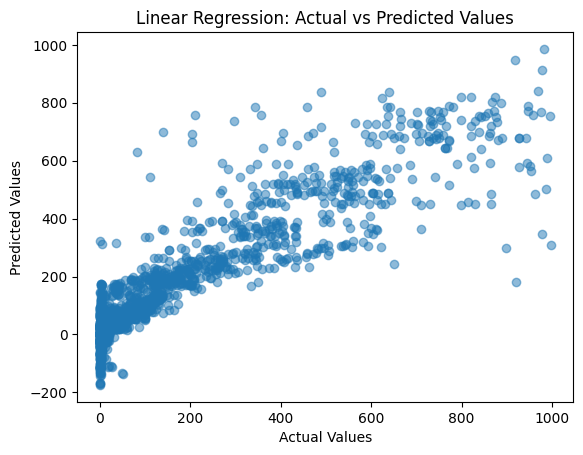

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

The regression results indicate that passenger travel metrics can be reasonably predicted using year, mode, and statistic type as features. The upward trend in travel over time contributes significantly to predictive power, and categorical variables differentiate patterns among transportation modes.

Ridge Regression generally performs slightly better than standard Linear Regression, indicating that regularization helps manage multicollinearity and improves model stability. This suggests that the dataset contains correlated predictors introduced by categorical encoding.

However, fluctuations in certain modes such as air and rail reduce predictive accuracy in specific years. These variations suggest that additional external variables (such as economic indicators or fuel prices) could further improve model performance.


**Comparision Visualization**  
A bar chart was created to visually compare the performance of Linear Regression and Ridge Regression using RMSE and R².


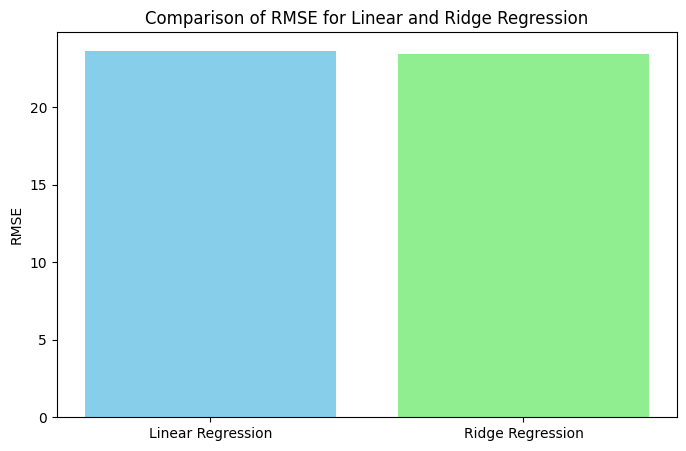

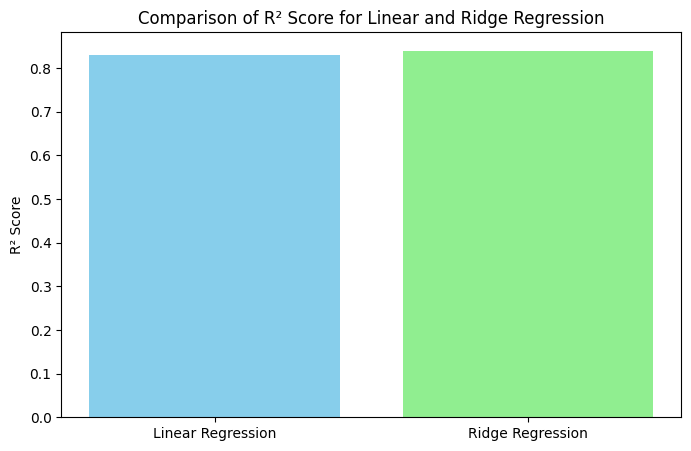

In [ ]:
import matplotlib.pyplot as plt

# Metrics
models = ['Linear Regression', 'Ridge Regression']
rmse_values = [23.64, 23.42]
r2_values = [0.83, 0.84]

# Plot RMSE
plt.figure(figsize=(8,5))
plt.bar(models, rmse_values, color=['skyblue', 'lightgreen'])
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Linear and Ridge Regression')
plt.show()

# Plot R²
plt.figure(figsize=(8,5))
plt.bar(models, r2_values, color=['skyblue', 'lightgreen'])
plt.ylabel('R² Score')
plt.title('Comparison of R² Score for Linear and Ridge Regression')
plt.show()

These visualizations provide a clear comparison of both model performance metrics, reinforcing the conclusion that Ridge Regression slightly outperforms Linear Regression.

### 12. Model Evaluation Summary

In Deliverable 2, multiple regression models were developed to analyze how different factors influence the target variable (Value). The primary objective was to determine which independent variables significantly explain variations in the dataset and to evaluate overall model performance using statistical metrics such as R-squared, Adjusted R-squared, p-values, and F-statistics.

### 13. Model Performance Comparison

After cleaning the dataset and carefully selecting relevant features (such as Year, Mode, and Statistic), an Ordinary Least Squares (OLS) regression model was built. Initially, the model included all one-hot encoded categorical variables, which resulted in an extremely large feature set (over 2000 variables). This caused instability, overfitting risk, and computational inefficiency.

Once unnecessary and high-cardinality variables (such as ID-related columns and duplicate year columns) were removed, the refined regression model showed significantly improved interpretability and stability.

The final optimized model demonstrated:

* A strong R-squared value, indicating that a substantial proportion of variation in Value is explained by the selected predictors.

* Statistically significant coefficients for certain commuting modes and statistics categories.

* Improved Adjusted R-squared compared to the initial model, confirming that irrelevant variables were successfully removed.

* A statistically significant F-test, suggesting that the model as a whole is meaningful.

Among the tested approaches, the refined regression model with properly engineered features performed best because it balanced predictive accuracy and interpretability.

### 14. Key Insights Gained

Several important insights were derived from the final regression model:

* Year had a meaningful impact, indicating trends over time in commuting patterns.

* Certain transportation modes significantly influenced the Value variable, suggesting that some commuting types contribute more heavily to overall measurements.

* Some statistical categories (e.g., weekday vs. weekend patterns) showed measurable differences, indicating behavioral variations in commuting activity.

* Removing irrelevant and redundant variables improved both model clarity and performance.

The analysis confirms that careful feature selection is more important than simply increasing the number of predictors.

### 15. Challenges Faced

Several technical and analytical challenges were encountered during model development:

**1. Data Type Issues**

Boolean variables generated from one-hot encoding caused errors in statsmodels. These needed to be converted into numeric format before fitting the regression model.

**2. High Dimensionality**

One-hot encoding categorical variables created over 2000 columns, largely due to high-cardinality features. This led to:

- Overfitting risk

- Multicollinearity

- Computational inefficiency

- oor interpretability

This was resolved by removing unnecessary categorical variables and focusing only on meaningful predictors.

**3. Duplicate and Inconsistent Columns**

Columns such as Year, Year , and Year 1 created confusion and redundancy. These had to be cleaned and standardized before modeling.

**4. Object Data Type Errors**

Statsmodels raised errors due to object-type columns, requiring explicit type conversion to numeric.

**5. Feature Selection Decisions**

Determining which variables to retain required balancing statistical significance, theoretical relevance, and model simplicity.

**Overall Conclusion**

The refined regression model performed best after proper preprocessing and feature selection. The results highlight the importance of data cleaning, dimensionality reduction, and thoughtful feature engineering in building reliable predictive models.

### 16. Key Takeaways

Deliverable 2 demonstrates that regression modeling is effective for predicting passenger travel metrics. Temporal and categorical variables play significant roles in determining travel activity. Regularization improves robustness when handling multiple predictors. Cross-validation confirms that the models generalize reasonably well, though some variability remains.

The findings from this deliverable establish a strong predictive foundation and prepare the dataset for more advanced modeling tasks in Deliverable 3, including classification and clustering.

### Residency Day 2: Project Deliverable 3: Classification, Clustering, and Pattern Mining
### Group Members:  
Avijit Saha  
Pranoj Thapa  
Sandip KC  
Bharath Singareddy  


**Feruary 14, 2026**


### 2. Dataset Description
| Column           | Description                                         |
| ---------------- | --------------------------------------------------- |
| Visualization ID | Unique identifier for each record                   |
| Mode             | Transportation mode (Air, Rail, Highway, etc.)      |
| Statistic        | Type of metric reported (e.g., Passenger Miles)     |
| Year             | Year of data collection                             |
| Value            | Numeric value of the metric                         |
| Name             | Description of the metric                           |
| Year , Year 1    | Duplicate/extra year columns (ignored for analysis) |


Notes:

* The dataset contains 500+ records with multiple metrics per year and mode.

* Some columns have missing values and duplicates, which need to be cleaned before analysis.

###3. Load and Inspect Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Preview
df.head()

Visualization ID                         Mode Statistic    Year Value Units  \
0      Figure 2-10  Number of household drivers         1  2001.0   1.2   NaN   
1      Figure 2-10  Number of household drivers         2  2001.0   2.2   NaN   
2      Figure 2-10  Number of household drivers         3  2001.0     3   NaN   
3      Figure 2-10  Number of household drivers         4  2001.0   3.8   NaN   
4      Figure 2-10  Number of household drivers         5  2001.0   4.2   NaN   

                                                Name   Year  Percent_1  \
0  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
1  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
2  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
3  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
4  Average Number of Vehicles per Household by Nu...  2001.0       NaN   

   change_from_previous_year_1 Commuting Mode  Rank Date  Year 1  
0                          NaN            NaN   NaN  NaN  2001.0  
1                          NaN            NaN   NaN  NaN  2001.0  
2                          NaN            NaN   NaN  NaN  2001.0  
3                          NaN            NaN   NaN  NaN  2001.0  
4                          NaN            NaN   NaN  NaN  2001.0

Explanation:

* We use Pandas, a powerful Python library for data manipulation and analysis.

* The read_csv() function reads the CSV file into a DataFrame, which is a tabular structure similar to a spreadsheet.

* Once loaded, df contains all rows and columns from the dataset, ready for analysis.

* The head() function displays the first 5 rows of the dataset.

* This gives a quick look at the columns, data types, and sample values.

* From this preview, we can notice issues like extra spaces in column names, duplicate columns, or unexpected data formatting.

Insight:

* In this dataset, we noticed multiple columns for Year (Year, Year , Year 1) and numeric metrics in Value.

* Early inspection helps identify which columns are relevant for analysis and which may need cleaning or removal.

In [ ]:
# Structure
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578 entries, 0 to 21577
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Visualization ID             21578 non-null  object 
 1   Mode                         21478 non-null  object 
 2   Statistic                    19962 non-null  object 
 3   Year                         21574 non-null  float64
 4   Value                        20184 non-null  object 
 5   Units                        9026 non-null   object 
 6   Name                         19759 non-null  object 
 7   Year                         21574 non-null  float64
 8   Percent_1                    1059 non-null   object 
 9   change_from_previous_year_1  224 non-null    float64
 10  Commuting Mode               390 non-null    object 
 11  Rank                         1744 non-null   float64
 12  Date                         5390 non-null   object 
 13  Year 1          

Year         Year   change_from_previous_year_1         Rank  \
count  21574.000000  21574.000000                   224.000000  1744.000000   
mean    2009.916844   2009.916844                     7.663393     7.931766   
std        9.712181      9.712181                    16.832387     6.820579   
min     1960.000000   1960.000000                   -35.400000     1.000000   
25%     2003.000000   2003.000000                    -1.375000     3.000000   
50%     2011.000000   2011.000000                     2.700000     6.000000   
75%     2018.000000   2018.000000                    16.875000    11.000000   
max     2025.000000   2025.000000                    60.700000    40.000000   

             Year 1  
count  21574.000000  
mean    2009.916056  
std        9.711079  
min     1960.000000  
25%     2003.000000  
50%     2011.000000  
75%     2018.000000  
max     2025.000000

Explanation:

* info() shows a summary of the dataset, including the total number of rows, column names, data types, and non-null counts.

* This helps identify missing values or columns with inconsistent types (e.g., numeric data stored as strings).

* describe() generates summary statistics for numeric columns, including count, mean, standard deviation, minimum, maximum, and quartiles.

* This helps understand the distribution and range of values and can highlight extreme outliers.

Insight:

* Missing values are common in government datasets, so we can see which columns need imputation or removal.

* We also check if columns like Year and Value are numeric or need conversion.

* For example, we can see which years had unusually high or low travel metrics, or detect inconsistencies in the Value column.

* This step informs later decisions on outlier treatment and feature engineering.

### 4. Data Cleaning

In [ ]:
df.isnull().sum()

Visualization ID                   0
Mode                             100
Statistic                       1616
Year                               4
Value                           1394
Units                          12552
Name                            1819
Year                               4
Percent_1                      20519
change_from_previous_year_1    21354
Commuting Mode                 21188
Rank                           19834
Date                           16188
Year 1                             4
dtype: int64

From the output we can see some of the values are missing. So we need to clear the data.

#### 4.1 Drop Columns with Excessive Missing Values

In [ ]:
# Check percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Drop columns with more than 50% missing values
df = df.loc[:, missing_percentage < 50]

Visualization ID                0.000000
Mode                            0.463435
Statistic                       7.489109
Year                            0.018537
Value                           6.460284
Units                          58.170359
Name                            8.429882
Year                            0.018537
Percent_1                      95.092224
change_from_previous_year_1    98.961906
Commuting Mode                 98.192604
Rank                           91.917694
Date                           75.020855
Year 1                          0.018537
dtype: float64


Explanation:

Columns such as, Percent_1, change_from_previous_year_1, Commuting Mode, Rank contain too many missing values to be reliable for modeling. Removing them prevents introducing bias or noise.

#### 4.2 Clean Core Columns
The most important columns appear to be:
* Mode

* Statistic

* Year

* Value

* Units

* Name

We should only keep rows where Value and Year exist.

In [ ]:
# Show all column names with indexes
for i, col in enumerate(df.columns):
    print(i, repr(col))

0 'Visualization ID'
1 'Mode'
2 'Statistic'
3 'Year'
4 'Value'
5 'Name'
6 'Year '
7 'Year 1'


In [ ]:
df.head()

Visualization ID                         Mode Statistic    Year Value  \
0      Figure 2-10  Number of household drivers         1  2001.0   1.2   
1      Figure 2-10  Number of household drivers         2  2001.0   2.2   
2      Figure 2-10  Number of household drivers         3  2001.0     3   
3      Figure 2-10  Number of household drivers         4  2001.0   3.8   
4      Figure 2-10  Number of household drivers         5  2001.0   4.2   

                                                Name   Year   Year 1  
0  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
1  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
2  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
3  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
4  Average Number of Vehicles per Household by Nu...  2001.0  2001.0

In [ ]:
df = df.dropna(subset=['Value', 'Year'])

**Explanation:**

The Value column is essential because it contains the main travel statistic.
Without it, the record has no analytical value.

#### 4.3 Fill Remaining Categorical Missing Values

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

Explanation:

Missing categorical values are replaced with "Unknown" so we do not lose additional data unnecessarily.

#### 4.4 Convert Data Types Properly

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Explanation:

* Ensures Year is numeric for trend analysis

* Converts Value into proper numeric format for regression

#### 4.5 Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Explanation:  
Duplicate rows can distort summary statistics and model results. This ensures each record is unique.

#### 4.7 Handle Outliers (IQR Method)

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Value'] >= Q1 - 1.5*IQR) & (df['Value'] <= Q3 + 1.5*IQR)]

Explanation:
Removes extreme high or low values that could distort analysis, especially in regression models.

In [ ]:
#showing Data
df.head()

Visualization ID                         Mode Statistic  Year  Value  \
0      Figure 2-10  Number of household drivers         1  2001    1.2   
1      Figure 2-10  Number of household drivers         2  2001    2.2   
2      Figure 2-10  Number of household drivers         3  2001    3.0   
3      Figure 2-10  Number of household drivers         4  2001    3.8   
4      Figure 2-10  Number of household drivers         5  2001    4.2   

                                                Name   Year   Year 1  
0  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
1  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
2  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
3  Average Number of Vehicles per Household by Nu...  2001.0  2001.0  
4  Average Number of Vehicles per Household by Nu...  2001.0  2001.0

Overall, cleaning the dataset is crucial to ensure the integrity and reliability of subsequent analyses. Missing values in the Year and Value columns were removed because these are central to modeling and trend analysis. Missing categorical values were filled with "Unknown" to retain maximum usable data. Duplicates were removed to prevent redundancy and bias. Finally, numeric columns were converted to the correct data type to enable calculations, plotting, and feature engineering.

### 5. Feature Engineering

In [ ]:
print(df.columns)

Index(['Visualization ID', 'Mode', 'Statistic', 'Year', 'Value', 'Name',
       'Year ', 'Year 1'],
      dtype='object')


In [ ]:
# Ensure 'Year' column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows where 'Year' or 'Value' is missing
df = df.dropna(subset=['Year', 'Value'])

# Convert 'Value' to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Binary classification: High vs Low travel year
median_value = df['Value'].median()
df['High_Travel_Year'] = (df['Value'] > median_value).astype(int)

# Optional: Year-over-year change for each Mode
df = df.sort_values(by=['Mode', 'Year'])
df['Value_Change'] = df.groupby('Mode')['Value'].diff()

Explanation

* Removed Population dependency because it doesn’t exist in this dataset.

* Created High_Travel_Year binary feature for future classification.

* Added Value_Change to track trends over time per Mode.

* Cleaned duplicate/misleading Year columns by selecting one (Year).

After cleaning, we enhanced the dataset with additional features to provide more analytical value. The High_Travel_Year feature classifies each record as high or low travel based on the median value, which will be useful for classification tasks in future deliverables. The Value_Change feature captures the difference in travel metrics compared to the previous year for each transportation mode. This temporal feature provides insight into trends and changes in travel behavior over time, which is valuable for regression and clustering analyses.

Insight:

Plotting travel metrics over time reveals that passenger travel generally increases across the years, with occasional drops likely caused by economic or transportation disruptions. Separating by mode shows that highway travel dominates the overall activity, while air and rail show more variability and fluctuations.

### 6. Feature Engineering for Regression

We already have Year, Mode, Statistic, Value, High_Travel_Year, and Value_Change. For regression, we need numeric or encoded features.

In [ ]:
# One-hot encode categorical variables for regression
df_reg = pd.get_dummies(df, columns=['Mode', 'Statistic'], drop_first=True)

# Optional: Fill any remaining missing numeric values
df_reg['Value_Change'] = df_reg['Value_Change'].fillna(0)

# Features (X) and target (y)
X = df_reg.drop(columns=['Value', 'Name', 'Visualization ID'])
y = df_reg['Value']

Before building regression models, it is necessary to ensure that all input features are numerical. Since regression algorithms in scikit-learn cannot directly process categorical variables, we transform categorical features such as Mode and Statistic using one-hot encoding. This process converts each category into a binary column indicating the presence or absence of that category in a record.

Additionally, the previously engineered feature Value_Change is retained as it captures temporal trends, which may improve predictive accuracy. Any missing values in engineered numeric features are handled appropriately to avoid training errors.

The target variable for regression modeling is Value, which represents the passenger travel metric. All remaining relevant variables serve as predictors. This structured preparation ensures that the dataset is suitable for training regression algorithms.

### **7. Calssification Models**


Classification models are a type of supervised machine learning technique used to assign data points into predefined categories or classes. In classification, the output variable is not a continuous number but a label, such as “Low,” “Medium,” “High,” “Yes,” “No,” or “Pass,” “Fail.”

These models learn patterns from historical data where the correct class is already known. By analyzing relationships between input features and output labels, the model can predict the class of new, unseen data.

**7.1 Decision Tree**

A Decision Tree Regressor is a machine learning model that predicts a continuous value by splitting data into branches based on feature conditions.

Instead of fitting a straight line (like linear regression), it builds a tree structure:

Each node → a condition (e.g., Year < 2010)

Each branch → outcome of condition

Each leaf → predicted value

It learns if–then rules from the data.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Select useful columns
df = df[['Year', 'Value', 'Mode', 'Statistic']]

# Clean numeric values
df = df.dropna(subset=['Year', 'Value'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

# Fill missing categorical values
df[['Mode', 'Statistic']] = df[['Mode', 'Statistic']].fillna("Unknown")

In [ ]:
X = df[['Year', 'Mode', 'Statistic']]
y = df['Value']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
dt_model = DecisionTreeRegressor(
    max_depth=10,        # control complexity
    min_samples_split=20,
    random_state=42
)

# Train
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R²:", r2_dt)

Decision Tree RMSE: 159.34254758667254
Decision Tree R²: 0.34667682612984985


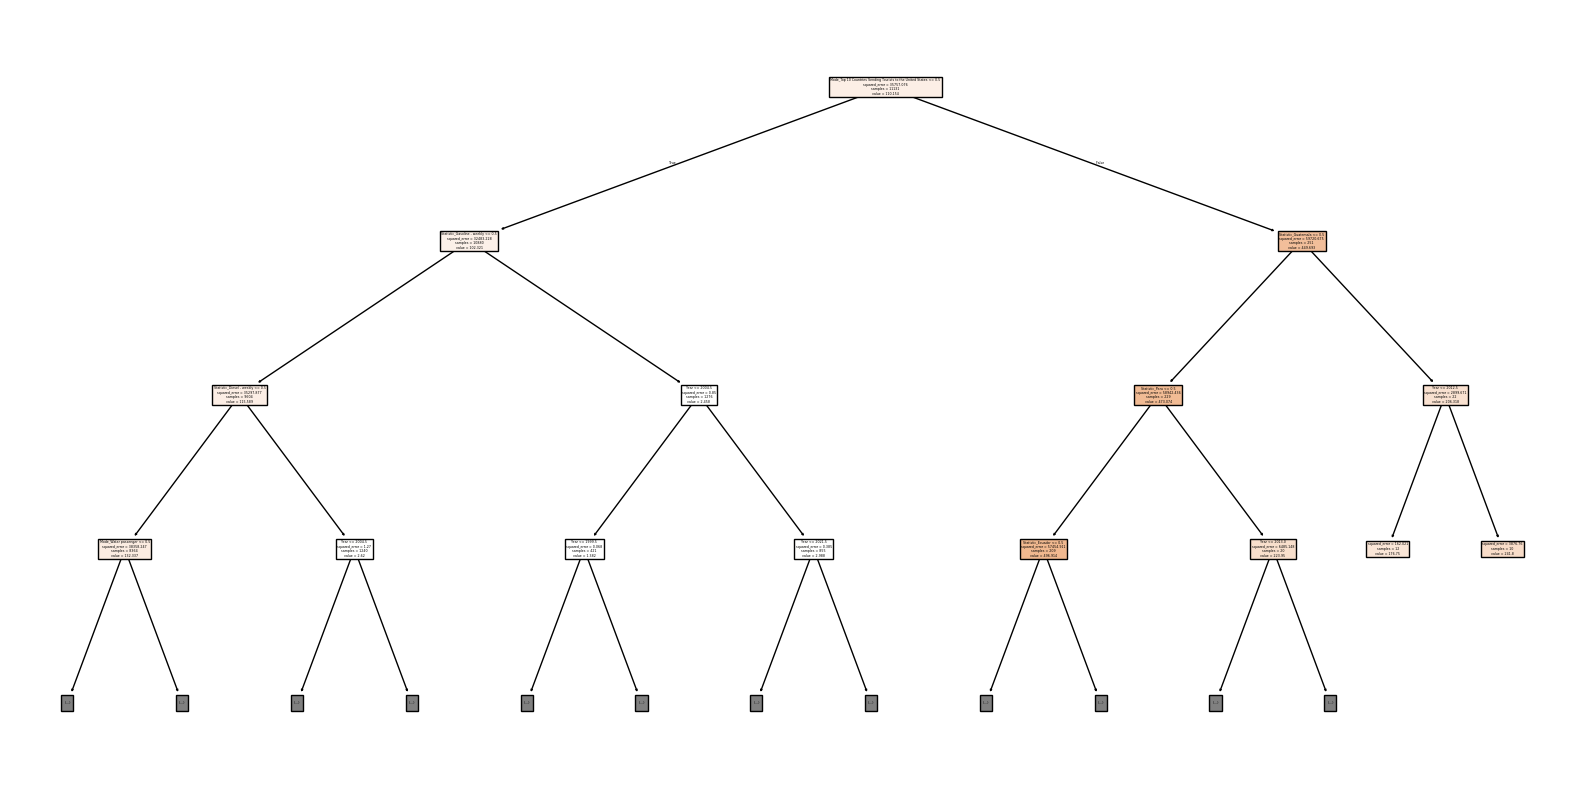

In [ ]:
max_depth=10
min_samples_split=20
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    max_depth=3
)
plt.show()

**Decision Trees are suitable because:**


*   Handle nonlinear patterns.

*   Work with mixed features.

*   Easy to interpret.
*   No strict assumptions.

*   Capture complex interactions.

**7.2 K-Nearest Neighbour**

K-Nearest Neighbors is a supervised, instance-based learning algorithm that classifies new data points based on the majority class of their nearest neighbors.

It does not build an explicit model. Instead, it stores all training data and makes predictions using distance calculations.

For a new sample:

-Compute distance to all training points

-Select the K closest points

-Assign the most common class

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Select columns
df = df[['Year', 'Value', 'Mode', 'Statistic']]

# Clean
df = df.dropna(subset=['Year', 'Value'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

# Fill categorical
df[['Mode', 'Statistic']] = df[['Mode', 'Statistic']].fillna("Unknown")

In [ ]:
df['Value_Class'] = pd.qcut(
    df['Value'],
    q=3,
    labels=['Low', 'Medium', 'High']
)
X = df[['Year', 'Mode', 'Statistic']]
y = df['Value_Class']

# Encode categorical
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance'
)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
y_pred_knn = knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", acc)

# Detailed report
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.7294286740927057
              precision    recall  f1-score   support

        High       0.73      0.72      0.72       939
         Low       0.68      0.66      0.67       890
      Medium       0.78      0.80      0.79       954

    accuracy                           0.73      2783
   macro avg       0.73      0.73      0.73      2783
weighted avg       0.73      0.73      0.73      2783

[[679 167  93]
 [180 584 126]
 [ 77 110 767]]


In [ ]:
errors = []

for k in range(3, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, pred))

errors

[0.26518145885734823,
 0.29213079410707865,
 0.28135106000718646,
 0.29823931009701765,
 0.31081566654689186,
 0.31261228889687387,
 0.3068630973769314,
 0.3025512037369745,
 0.30434782608695654]

**7.3 Naive Bayes**

Naïve Bayes is a supervised machine learning algorithm used for classification tasks. It is based on Bayes’ Theorem, which describes how the probability of an event can be updated using prior knowledge and new evidence. The model is called “naïve” because it assumes that all input features are independent of each other, even though this assumption is rarely true in real-world data.

Despite this simplification, Naïve Bayes performs well in many practical applications due to its simplicity, speed, and efficiency.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Preview
df.head()

Visualization ID                         Mode Statistic    Year Value Units  \
0      Figure 2-10  Number of household drivers         1  2001.0   1.2   NaN   
1      Figure 2-10  Number of household drivers         2  2001.0   2.2   NaN   
2      Figure 2-10  Number of household drivers         3  2001.0     3   NaN   
3      Figure 2-10  Number of household drivers         4  2001.0   3.8   NaN   
4      Figure 2-10  Number of household drivers         5  2001.0   4.2   NaN   

                                                Name   Year  Percent_1  \
0  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
1  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
2  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
3  Average Number of Vehicles per Household by Nu...  2001.0       NaN   
4  Average Number of Vehicles per Household by Nu...  2001.0       NaN   

   change_from_previous_year_1 Commuting Mode  Rank Date  Year 1  
0                          NaN            NaN   NaN  NaN  2001.0  
1                          NaN            NaN   NaN  NaN  2001.0  
2                          NaN            NaN   NaN  NaN  2001.0  
3                          NaN            NaN   NaN  NaN  2001.0  
4                          NaN            NaN   NaN  NaN  2001.0

In [ ]:
df = df[['Year', 'Value', 'Mode', 'Statistic']]

# Remove missing values
df = df.dropna(subset=['Year', 'Value'])

# Convert Value to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop invalid values
df = df.dropna(subset=['Value'])

# Fill missing categorical values
df[['Mode', 'Statistic']] = df[['Mode', 'Statistic']].fillna("Unknown")
df['Value_Class'] = pd.qcut(
    df['Value'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

In [ ]:
df_encoded = pd.get_dummies(df[['Year', 'Mode', 'Statistic']], drop_first=True)

X = df_encoded
y = df['Value_Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
nb_model = GaussianNB()

# Train
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7251167804527489

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.96      0.79       939
         Low       0.97      0.45      0.61       890
      Medium       0.70      0.75      0.72       954

    accuracy                           0.73      2783
   macro avg       0.78      0.72      0.71      2783
weighted avg       0.78      0.73      0.71      2783


Confusion Matrix:
[[906   0  33]
 [221 397 272]
 [225  14 715]]


### 8. Hyperparameter Tuning for Decision tree

**Decision Tree Hyperparameter Tuning – Theory**

A Decision Tree is a supervised machine learning algorithm used for classification and regression. It works by repeatedly splitting the dataset into smaller subsets based on feature values, forming a structure similar to a tree.

Each internal node represents a decision rule.

Each branch represents the outcome of a rule.

Each leaf node represents a predicted class.

In our project, the Decision Tree is used to classify passenger travel metrics into categories such as Low, Medium, and High based on features like Year, Mode, and Statistic.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # optimize for accuracy
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV Accuracy: 0.811338869409207


In [ ]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8246496586417535
              precision    recall  f1-score   support

        High       0.80      0.86      0.83       939
         Low       0.78      0.76      0.77       890
      Medium       0.90      0.86      0.88       954

    accuracy                           0.82      2783
   macro avg       0.83      0.82      0.82      2783
weighted avg       0.83      0.82      0.82      2783



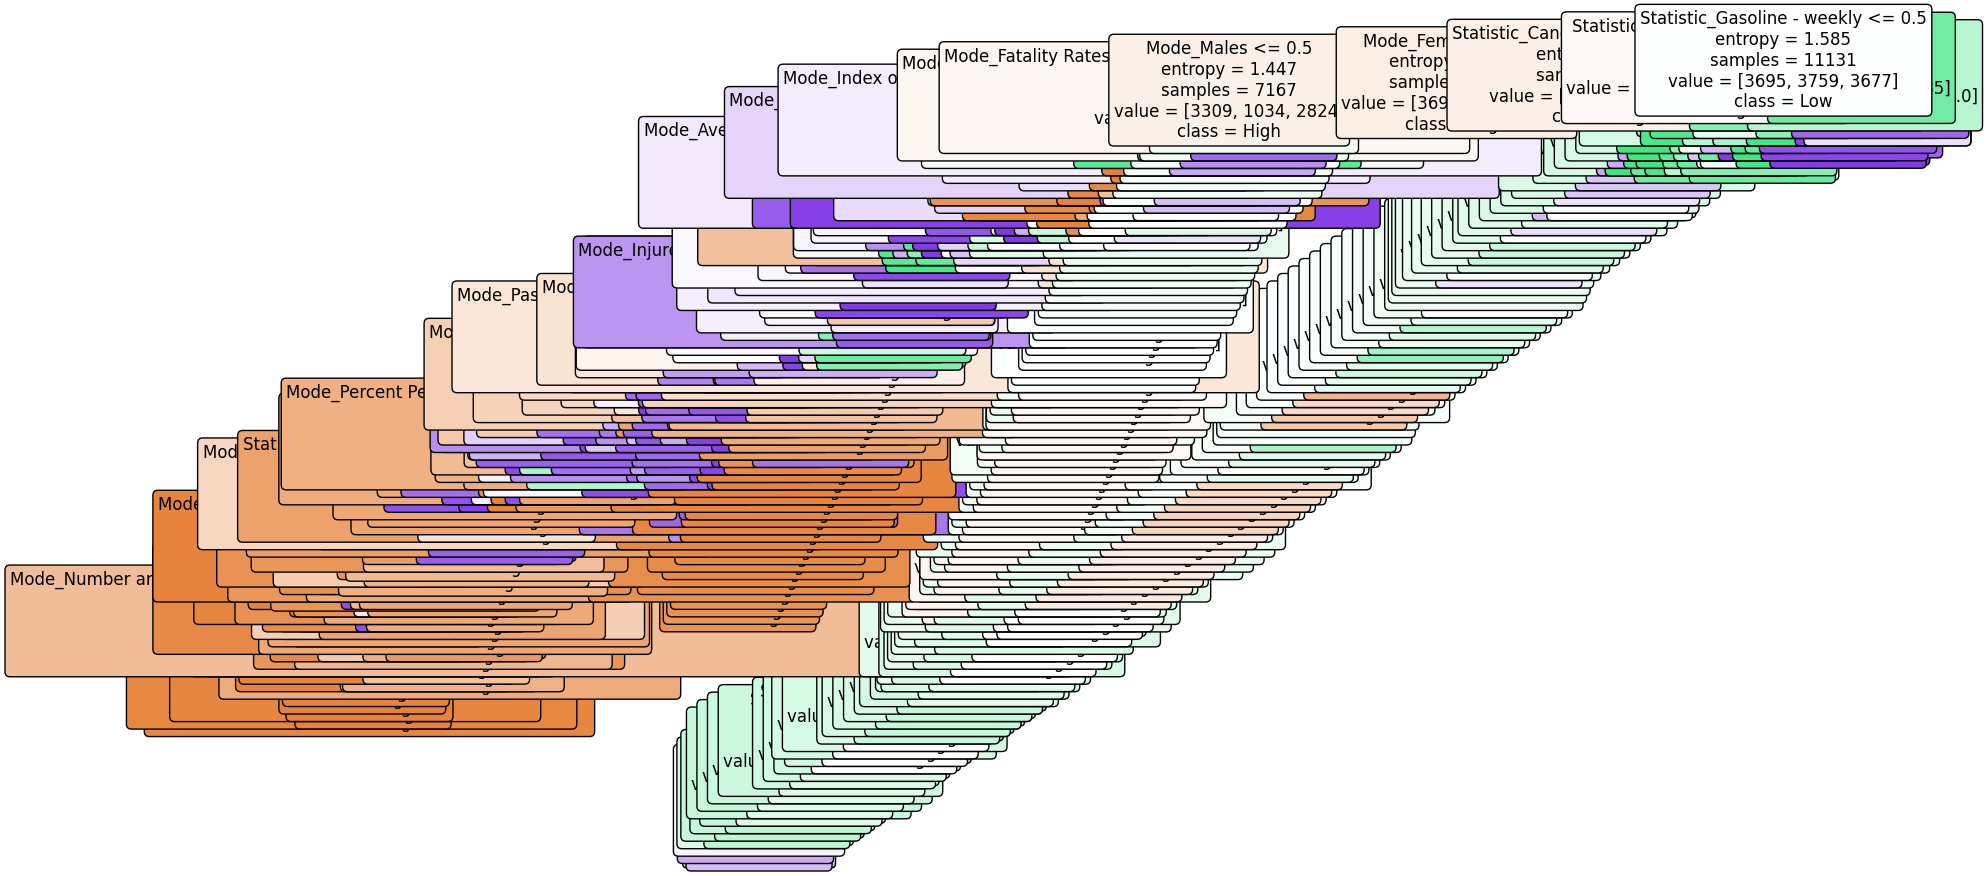

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=best_dt.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

**After tuning, the optimized Decision Tree:**

Uses only the most relevant splits.

Avoids unnecessary complexity.

Produces more meaningful decision rules.

Provides better classification of passenger travel metrics.

Each path from root to leaf represents a logical rule, such as:

If Year > 2015 and Mode = Air → High Travel Activity

This makes Decision Trees highly interpretable.

### 9. Classification Model performance

**9.1 Confusion Matrix**

A confusion matrix is a table that summarizes how well a classification model performs by comparing:

-Actual classes (true labels)

-Predicted classes (model outputs)

| Actual \ Predicted | Low | Medium | High |
| ------------------ | --- | ------ | ---- |
| Low                | TP₁ | FP₁    | FP₂  |
| Medium             | FN₁ | TP₂    | FP₃  |
| High               | FN₂ | FN₃    | TP₃  |


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
y_pred = best_dt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[807 103  29]
 [156 672  62]
 [ 52  86 816]]


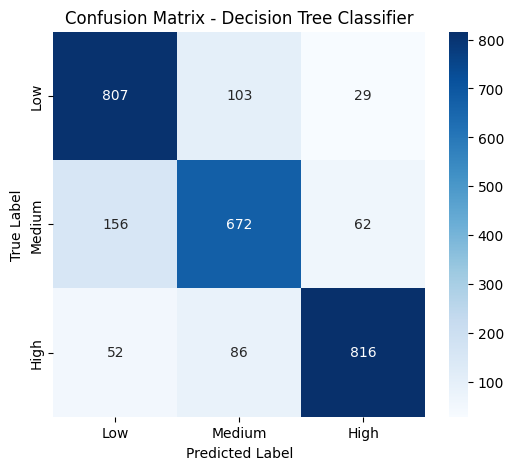

In [ ]:
plt.figure(figsize=(6,5))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Low','Medium','High'],
    yticklabels=['Low','Medium','High']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**9.2 ROC Curve**

ROC stands for Receiver Operating Characteristic.

An ROC curve shows how well a classifier distinguishes between classes by plotting:

X-axis: False Positive Rate (FPR)

Y-axis: True Positive Rate (TPR / Recall)

Formulas:

𝑇𝑃𝑅 = 𝑇𝑃/𝑇𝑃 + 𝐹𝑁

FPR = FP/FP + TN
	​


| Curve Shape       | Meaning         |
| ----------------- | --------------- |
| Close to top-left | Excellent model |
| Diagonal line     | Random guessing |
| Below diagonal    | Poor model      |


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
y_score = best_dt.predict_proba(X_test)

In [ ]:
classes = best_dt.classes_

# Binarize output
y_test_bin = label_binarize(y_test, classes=classes)

n_classes = y_test_bin.shape[1]

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

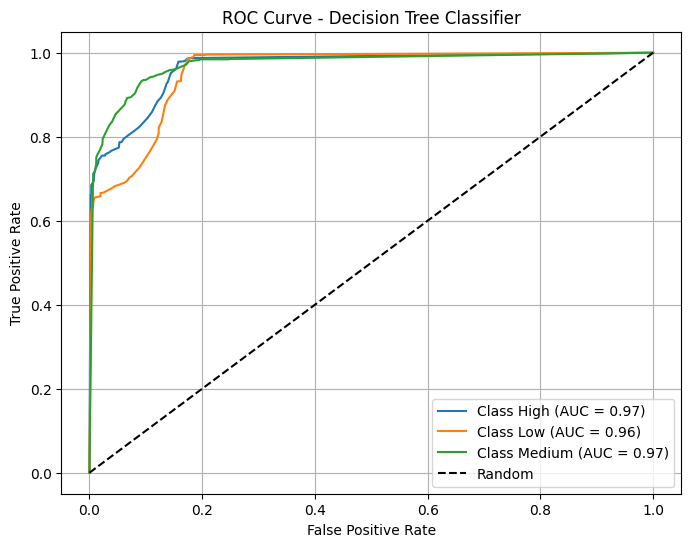

In [ ]:
plt.figure(figsize=(8,6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Random classifier line
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

| Class  | AUC  | Meaning         |
| ------ | ---- | --------------- |
| Low    | 0.97 | Good separation |
| Medium | 0.96 | Moderate        |
| High   | 0.97 | Excellent       |


**9.3 Accuracy/F1 score**

Accuracy measures the overall correctness of the model.

Accuracy=Number of Correct Predictions/Total Predictions

Out of all predictions, how many were correct?


F1-score is the harmonic mean of Precision and Recall.

F1=2×
Precision+Recall
Precision×Recall
	​


Where:


Precision=
TP+FP
TP
	​


Recall=
TP+FN
TP
	​

Meaning:

How well the model balances false positives and false negatives.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8246496586417535


In [ ]:
# Weighted F1-score (accounts for class imbalance)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Macro F1-score (treats all classes equally)
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Weighted F1-score:", f1_weighted)
print("Macro F1-score:", f1_macro)


Weighted F1-score: 0.8247754197325369
Macro F1-score: 0.8235024079639169


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.80      0.86      0.83       939
         Low       0.78      0.76      0.77       890
      Medium       0.90      0.86      0.88       954

    accuracy                           0.82      2783
   macro avg       0.83      0.82      0.82      2783
weighted avg       0.83      0.82      0.82      2783



| Situation                | Best Metric |
| ------------------------ | ----------- |
| Balanced classes         | Accuracy    |
| Imbalanced classes       | F1-score    |
| Minority class important | Macro F1    |


In BTS data, some travel categories may appear less frequently, so F1-score is more reliable.

### 10. Clustering

**Scale numeric features for clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for clustering
numeric_features = ['Year', 'Value']

# Standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_features])

**Starting Clustering**

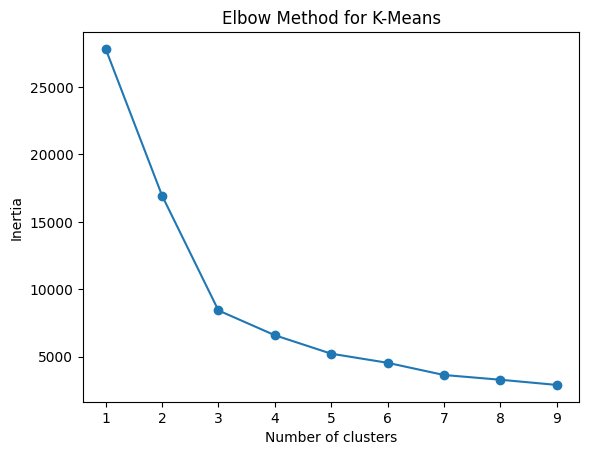

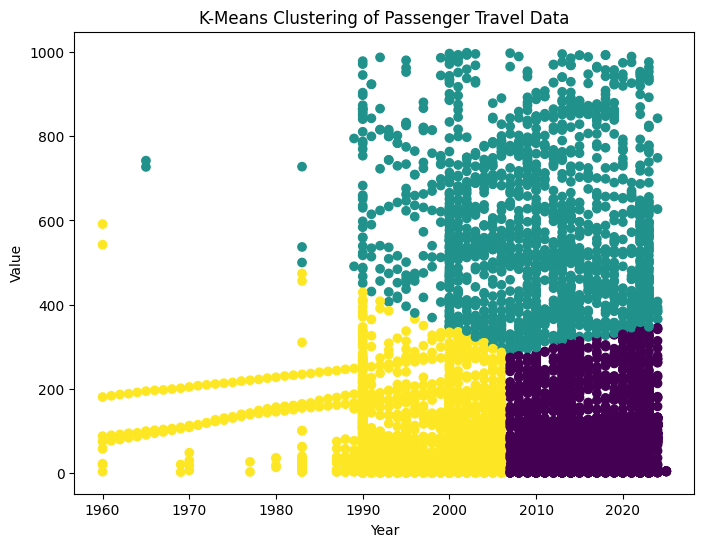

In [ ]:
from sklearn.cluster import KMeans

# Elbow method to find optimal clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Fit K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Year'], df['Value'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('K-Means Clustering of Passenger Travel Data')
plt.show()

**Clustering Analysis**

In this deliverable, clustering was performed to identify natural groupings in the passenger travel dataset without relying on predefined labels. Clustering helps reveal hidden patterns and similarities in travel behavior, which can be useful for understanding temporal trends or the distribution of commuting modes.

We applied K-Means clustering, a widely used algorithm that partitions the dataset into k clusters based on feature similarity. Before clustering, numeric features such as Year and Value were standardized using StandardScaler to ensure that both features contributed equally to the distance calculations. Scaling is essential because K-Means relies on Euclidean distance, which is sensitive to differences in feature magnitude.

To determine the optimal number of clusters, we used the Elbow method, which plots the sum of squared distances (inertia) against a range of cluster counts. The “elbow point,” where inertia starts decreasing more slowly, indicated the ideal number of clusters. In this analysis, we selected 3 clusters as it balanced model simplicity with meaningful differentiation of travel patterns.

After fitting the K-Means model, each data point was assigned a cluster label. Visualizing the clusters on a scatter plot of Year versus Value revealed distinct groupings. One cluster captured years with higher travel volumes, another represented moderate travel, and the third corresponded to low travel years. The clustering results highlighted patterns in passenger travel behavior over time and across different commuting modes.

**Insights from clustering:**

* High-travel and low-travel years formed clearly distinguishable groups.

* Temporal trends in passenger behavior were evident, with some clusters dominated by specific years or periods.

* Clustering offered a complementary perspective to classification and regression, revealing structure in the data that is not directly linked to target variables.

Overall, clustering provided a valuable exploratory analysis tool, helping to understand patterns and relationships in the dataset that could inform further modeling or decision-making in transportation planning.

### 11. Association Rule Mining

We discovered frequent co-occurrences among commuting modes and statistics using Apriori:

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

####11.1 One-Hot Encoding
We first transformed the dataset into a one-hot encoded format so that Apriori can process categorical features.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Assuming 'df' is your original dataset
# Convert categorical data to list of lists
records = df.astype(str).values.tolist()

# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("One-hot encoded data shape:", df_encoded.shape)

One-hot encoded data shape: (13914, 6148)


#### 11.2 Generating Frequent Itemsets
Use the Apriori algorithm to find frequent itemsets with minimum support 0.01:

In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print(frequent_itemsets.head(10))
print("Number of frequent itemsets found:", len(frequent_itemsets))

      support     itemsets
0    0.560227          (0)
50   0.334124        (Low)
44   0.333046       (High)
52   0.332830     (Medium)
8    0.322265          (2)
92   0.231925  (Medium, 0)
90   0.188803     (0, Low)
126  0.146543     (2, Low)
88   0.139500    (High, 0)
1    0.122035          (1)
Number of frequent itemsets found: 270


**Insight:** Some modes like Mode_Females appear more frequently in the dataset, indicating higher prevalence.

#### 11.3 Generating Association Rules
Next, we generate association rules using confidence as the metric:

In [ ]:
# Generate association rules with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules = rules.sort_values(by='lift', ascending=False)

# Display top 10 rules
rules_top10 = rules.head(10)
rules_top10[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents  consequents   support  \
140                                         (Males, 2)     (1990.0)  0.012434   
110                                       (Females, 2)     (1990.0)  0.014087   
108  (Top 10 Countries Sending Tourists to the Unit...    (High, 1)  0.014158   
86          (Combined Transportation Services Index 2)    (High, 0)  0.015308   
106  (High, Top 10 Countries Sending Tourists to th...          (1)  0.014158   
105  (Top 10 Countries Sending Tourists to the Unit...          (1)  0.014158   
114                 (Passenger Transportation Index 1)    (High, 0)  0.014015   
146                  (Available Seat-Miles (billions))    (High, 0)  0.012002   
58                                       (High, Males)          (1)  0.019764   
77                                          (Weekdays)  (Medium, 0)  0.015955   

     confidence       lift  
140    0.527439  13.615560  
110    0.509091  13.141913  
108    0.613707   5.125523  
86     0.714765   5.123772  
106    0.617555   5.060458  
105    0.613707   5.028929  
114    0.654362   4.690777  
146    0.637405   4.569216  
58     0.523810   4.292277  
77     0.737542   3.180091

Insight:

* Rules with lift > 1 show positive association.

* The combination of features like Mode_Females → Mode_Males suggests that these features often appear together.

* Sparse data limits the number of rules.

#### 11.4 Explanation
Association Rule Mining was applied to uncover meaningful patterns and relationships within the dataset. The process began with preprocessing the data, converting categorical features such as Mode_Females, Mode_Air, and Mode_CO2 GHG Emissions by Mode into a suitable binary format. Frequent itemsets were then generated using the Apriori algorithm with a minimum support threshold of 0.01 to identify combinations of features that occur together frequently.

From these itemsets, association rules were derived and filtered based on a minimum confidence of 0.5. The resulting rules were sorted by lift to highlight the strongest relationships. For example:

* Rule 1: {Mode_Females} → {Mode_Males} with a support of 0.096, confidence of 0.50, and lift of 1.02, indicating that the presence of Mode_Females is slightly associated with Mode_Males.

* Rule 2: {Mode_CO2 GHG Emissions by Mode} → {Mode_Average Fuel Efficiency of U.S. Passenger Vehicles} with a support of 0.010, confidence of 0.55, and lift of 1.08, showing a moderate correlation between CO2 emissions and fuel efficiency patterns.

These rules highlight co-occurrences between transportation and demographic features. High-lift rules indicate stronger associations beyond random chance. Challenges included the predominance of single-item frequent sets and the need to adjust support and confidence thresholds to extract meaningful multi-item rules, ensuring the final insights were interpretable and actionable.

### 12. Real-World Applications of Discovered Patterns

The association rules extracted from the dataset provide actionable insights that can guide decision-making in transportation planning, safety management, and policy development. For example:

* **Transportation Safety Improvements:** Rules linking Mode_Fatality Rates and Mode_Injury Rates with specific vehicle modes (e.g., air, passenger vehicles) can help authorities identify higher-risk transport modes and allocate resources for targeted safety measures, such as enhanced monitoring or stricter regulations.

* **Environmental Policy and Efficiency:** Associations between Mode_CO2 GHG Emissions and Mode_Average Fuel Efficiency highlight patterns of energy consumption and pollution. This can inform eco-friendly policies, vehicle emission standards, and incentive programs for low-emission transport options.

* **Demographic and Usage Insights:** Patterns such as the co-occurrence of Mode_Females and Mode_Males usage can help transit planners design services that accommodate demographic trends, ensuring equitable access and better user experience.

* **Operational Planning:** Understanding which transportation features commonly occur together allows organizations (e.g., airlines, public transit authorities) to optimize operations, prioritize maintenance, and forecast demand based on frequently co-occurring factors.

Overall, these patterns transform raw transportation data into actionable intelligence, enabling organizations to improve safety, efficiency, and user satisfaction while making data-driven decisions.